# Machine Learning Algorithm

## Support Vector Machines (SVM)

In [62]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
cd C:/Users/yewch/Python Lecture/CPC152 Assignment 2

C:\Users\yewch\Python Lecture\CPC152 Assignment 2


In [64]:
df = pd.read_csv("heart disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
# print the first 10 rows of dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [66]:
# get summary of numerical variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
#check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As shown above the dataset does not have any null values

In [68]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Now we check for any duplicated values in the dataset

In [69]:
duplicatedRows = df[df.duplicated()]
duplicatedRows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [70]:
# drop the duplicated row of the dataset

df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [71]:
# Splitting the Dataset into 80% train set 20% test set
from sklearn.model_selection import train_test_split
 

# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [72]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [73]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [74]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [75]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

## Standard Scaling

In [76]:
#perform standard scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Basic Fitting 8:2

In [77]:
#import models from sckit learn module:
from sklearn import svm
from sklearn import metrics

In [78]:
model = svm.SVC()

In [79]:
model.fit(X_train_scaled,y_train) 

SVC()

In [80]:
predictions =  model.predict(X_test_scaled)
predictions

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [81]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, predictions))
print ('Recall:', recall_score(y_test, predictions, average="weighted"))
print ('Precision:', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8688524590163934
Recall: 0.8688524590163934
Precision: 0.873504145252654
Confusion matrix:
[[21  6]
 [ 2 32]]


## Basic Fitting 7:3

In [82]:
# Splitting the Dataset into 70% train set and 30% test set
 
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [83]:
X_train2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [84]:
X_test2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [85]:
y_train2

137    1
106    1
284    0
44     1
139    1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 212, dtype: int64

In [86]:
y_test2

225    0
152    1
228    0
201    0
52     1
      ..
253    0
293    0
76     1
272    0
238    0
Name: target, Length: 91, dtype: int64

In [87]:
#perform standard scaling 

scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train2)

# Transform the training and test sets
X_train_scaled2 = scaler.transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [88]:
model.fit(X_train_scaled2,y_train2) 

SVC()

In [89]:
predictions2 = model.predict(X_test_scaled2)
predictions2

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [90]:

print ('Accuracy:', accuracy_score(y_test2, predictions2))
print ('Recall:', recall_score(y_test2, predictions2, average="weighted"))
print ('Precision:', precision_score(y_test2, predictions2, average="weighted"))
confusion = confusion_matrix(y_test2, predictions2)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8131868131868132
Recall: 0.8131868131868132
Precision: 0.8248430141287284
Confusion matrix:
[[31 13]
 [ 4 43]]


## Basic Fitting 6:4

In [91]:
# Splitting the Dataset into 60% train set and 40% test set
 
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [92]:
X_train3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [93]:
X_test3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2


In [94]:
y_train3

159    1
282    0
110    1
21     1
29     1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 181, dtype: int64

In [95]:
y_test3

225    0
152    1
228    0
201    0
52     1
      ..
83     1
136    1
210    0
118    1
60     1
Name: target, Length: 122, dtype: int64

In [96]:
#perform standard scaling 

scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train3)

# Transform the training and test sets
X_train_scaled3 = scaler.transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

In [97]:
model.fit(X_train_scaled3,y_train3) 

SVC()

In [98]:
predictions3 = model.predict(X_test_scaled3)
predictions3

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [99]:

print ('Accuracy:', accuracy_score(y_test3, predictions3))
print ('Recall:', recall_score(y_test3, predictions3, average="weighted"))
print ('Precision:', precision_score(y_test3, predictions3, average="weighted"))
confusion = confusion_matrix(y_test3, predictions3)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8114754098360656
Recall: 0.8114754098360656
Precision: 0.8209182543198937
Confusion matrix:
[[42 17]
 [ 6 57]]


## Prediction with Feature Selection
### Extra Tree Classifier

In [100]:
from sklearn.feature_selection import RFE

In [101]:
X = df.iloc[:,0:13] #features
y = df.iloc[:,-1] # target column / label --> target

In [102]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.07077515 0.05357731 0.1200831  0.0613566  0.06021249 0.01955509
 0.03753972 0.08599223 0.10463324 0.08488018 0.06661331 0.12956523
 0.10521634]


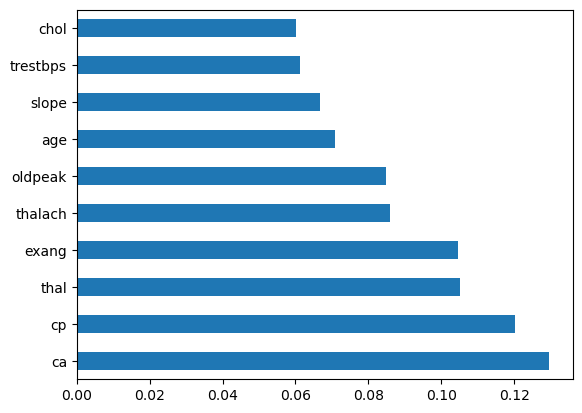

In [103]:
#plotting of graph to show and have better visualization

feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### SVM with Feature Selection
### Attempt 1
#### 8:2 with 5 features 

In [108]:
model = svm.SVC()

In [136]:
model.fit(X_train_scaled[:, [2,11,12,7,8]], y_train)

SVC()

In [138]:
predictions_1 = model.predict(X_test_scaled[:, [2,11,12,7,8]])
predictions_1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [139]:

print ('Accuracy:', accuracy_score(y_test, predictions_1))
print ('Recall:', recall_score(y_test, predictions_1, average="weighted"))
print ('Precision:', precision_score(y_test, predictions_1, average="weighted"))
confusion = confusion_matrix(y_test, predictions_1)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8688524590163934
Recall: 0.8688524590163934
Precision: 0.869471766848816
Confusion matrix:
[[22  5]
 [ 3 31]]


#### 7:3 with 5 features

In [140]:
model.fit(X_train_scaled2[:, [2,11,12,7,8]], y_train2)

SVC()

In [141]:
predictions_2 = model.predict(X_test_scaled2[:, [2,11,12,7,8]])
predictions_2

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [142]:

print ('Accuracy:', accuracy_score(y_test2, predictions_2))
print ('Recall:', recall_score(y_test2, predictions_2, average="weighted"))
print ('Precision:', precision_score(y_test2, predictions_2, average="weighted"))
confusion = confusion_matrix(y_test2, predictions_2)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8241758241758241
Recall: 0.8241758241758241
Precision: 0.8335886335886337
Confusion matrix:
[[32 12]
 [ 4 43]]


#### 6:4 with 5 features

In [143]:
model.fit(X_train_scaled3[:, [2,11,12,7,8]], y_train3)

SVC()

In [144]:
predictions_3 = model.predict(X_test_scaled3[:, [2,11,12,7,8]])
predictions_3

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [145]:

print ('Accuracy:', accuracy_score(y_test3, predictions_3))
print ('Recall:', recall_score(y_test3, predictions_3, average="weighted"))
print ('Precision:', precision_score(y_test3, predictions_3, average="weighted"))
confusion = confusion_matrix(y_test3, predictions_3)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8032786885245902
Recall: 0.8032786885245902
Precision: 0.8106573417599692
Confusion matrix:
[[42 17]
 [ 7 56]]



### Attempt 2
#### 8:2  with 4 features 

In [125]:
model.fit(X_train_scaled[:, [2,8,11,12]], y_train)

SVC()

In [126]:
predictions_4 = model.predict(X_test_scaled[:, [2,8,11,12]])
predictions_4

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [127]:

print ('Accuracy:', accuracy_score(y_test, predictions_4))
print ('Recall:', recall_score(y_test, predictions_4, average="weighted"))
print ('Precision:', precision_score(y_test, predictions_4, average="weighted"))
confusion = confusion_matrix(y_test, predictions_4)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8360655737704918
Recall: 0.8360655737704918
Precision: 0.8395918520463667
Confusion matrix:
[[20  7]
 [ 3 31]]


#### 7:3  with 4 features 

In [128]:
model.fit(X_train_scaled2[:, [2,8,11,12]], y_train2)

SVC()

In [129]:
predictions_5 = model.predict(X_test_scaled2[:, [2,8,11,12]])
predictions_5

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [130]:

print ('Accuracy:', accuracy_score(y_test2, predictions_5))
print ('Recall:', recall_score(y_test2, predictions_5, average="weighted"))
print ('Precision:', precision_score(y_test2, predictions_5, average="weighted"))
confusion = confusion_matrix(y_test2, predictions_5)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8241758241758241
Recall: 0.8241758241758241
Precision: 0.8395422946506538
Confusion matrix:
[[31 13]
 [ 3 44]]


#### 6:4 with 4 features

In [131]:
model.fit(X_train_scaled3[:, [2,8,11,12]], y_train3)

SVC()

In [132]:
predictions_6 = model.predict(X_test_scaled3[:, [2,8,11,12]])
predictions_6

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [133]:

print ('Accuracy:', accuracy_score(y_test3, predictions_6))
print ('Recall:', recall_score(y_test3, predictions_6, average="weighted"))
print ('Precision:', precision_score(y_test3, predictions_6, average="weighted"))
confusion = confusion_matrix(y_test3, predictions_6)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.819672131147541
Recall: 0.819672131147541
Precision: 0.8276007461147495
Confusion matrix:
[[43 16]
 [ 6 57]]
